In [1]:
import pandas as pd

#importando biblioteca de gráficos

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importando dataframe

df = pd.read_csv('dataset_life_expectancy.csv')
df = df.fillna(0)


# orig_cols = list(df.columns)
# new_cols = []
# for col in orig_cols:
#     new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
# df.columns = new_cols

df = df.rename(columns={
    'Country': 'pais',
    'Year': 'ano',
    'Status': 'status',
    'Life expectancy ':'expectativa_vida',
    'Adult Mortality':'mortalidade_adulta',
    'infant deaths': 'mortalidade_infantil',
    'Alcohol':'alcool',
    'Hepatitis B': 'hepatite_b',
    'Measles ': 'sarampo',
    'percentage expenditure': 'investimento_percentual_pib',
    'Total expenditure': 'investimento_total_governo',
    'GDP': "PIB",
    ' BMI ': 'IMC',
    'Polio':'poliomielite', 
    'Diphtheria ':'difteria', 
    ' HIV/AIDS' : 'aids', 
    'Population': 'populacao',  
    'Income composition of resources':'IDH', 
    'Schooling':'escolaridade'
})

df.head()



,pais,ano,status,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,investimento_percentual_pib,hepatite_b,sarampo,...,poliomielite,investimento_total_governo,difteria,aids,PIB,populacao,thinness 1-19 years,thinness 5-9 years,IDH,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Análise Descritiva

Verificamos a regra definina para a Expectativa de vida e ela segue a seguinte classificação:

- Alta: Expectativa de vida a partir (exclusive) de 63 anos
- Baixa: Expectativa de vida até (inclusive) 63 anos

In [2]:
# Tratando a base


df.loc[(df['status'] == 'Developed'), 'Developed'] = 1
df.loc[(df['status'] == 'Developing'), 'Developed'] = 0

df = df.groupby('pais').mean().reset_index()

df.loc[(df['expectativa_vida']<=63) & (df['expectativa_vida'].isnull() == False), 'class'] = 0
df.loc[(df['expectativa_vida']>63) & (df['expectativa_vida'].isnull() == False), 'class'] = 1



**Avaliando distribuição dos dados com histograma**

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

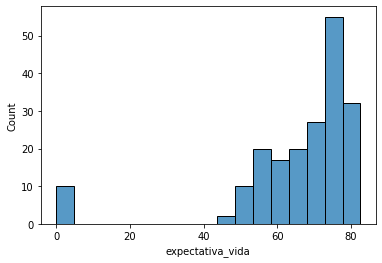

In [3]:
# Histograma para Expectativiva de vida geral

sns.histplot(
data=df,
x='expectativa_vida'
)

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

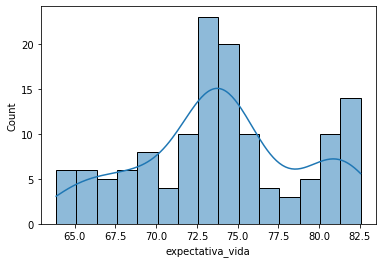

In [4]:
# Histograma para Expectativiva de vida alta
alta = df[df['class'] == 1] 

sns.histplot(
data = alta,
x='expectativa_vida',
bins= 15,
kde=True
)

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

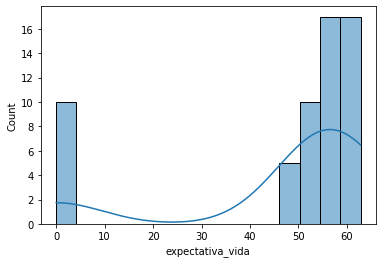

In [5]:
# Histograma para Expectativiva de vida baixa
baixa = df[df['class'] == 0] 

sns.histplot(
data = baixa,
x='expectativa_vida',
bins = 15,
kde = True
)

**Avaliando qualidade dos dados com Boxplot**

<AxesSubplot: ylabel='expectativa_vida'>

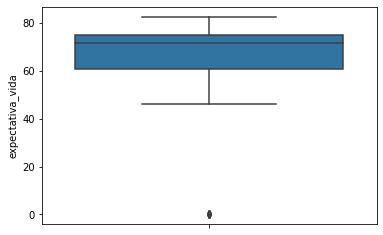

In [6]:
# Boxplot Geral

sns.boxplot(data = df,
y = 'expectativa_vida'
)

<AxesSubplot: xlabel='class', ylabel='expectativa_vida'>

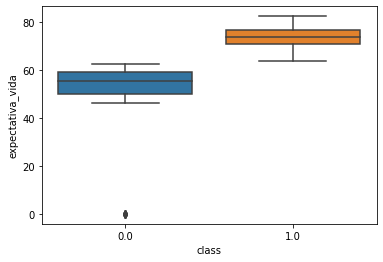

In [7]:
# Boxplot para as classificações

sns.boxplot(data = df,
y = 'expectativa_vida',
x = 'class', 
)


Ao analisar os gráficos acima vê-se a presença de ouliers bem distantes da concentração dos dados. por isso faz-se necessário realizar a remoção desses dados da base que iremos estudar.

In [8]:
# Removendo os outliers

life_expectancy = df['expectativa_vida']

quartil_1 = life_expectancy.quantile(0.25)
quartil_2 = life_expectancy.quantile(0.75)
inter_quartil = quartil_2 - quartil_1
lim_inferior = quartil_1 - 1.5*inter_quartil
lim_superior = quartil_2 + 1.5*inter_quartil

tratamento = (life_expectancy > lim_inferior) & (life_expectancy < lim_superior)

df_sem_ouliers = df[tratamento]

Sem a presença dos outliers vamos verificar com ficam o histograma e o boxplot 

**HISTOGRAMA**

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

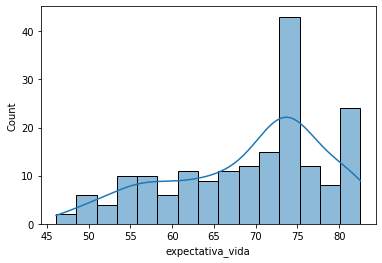

In [9]:
# Histograma para Expectativiva de vida geral

sns.histplot(
data=df_sem_ouliers,
x='expectativa_vida',
bins = 15,
kde=True
)

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

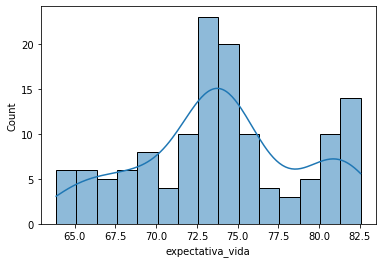

In [10]:
# Histograma para Expectativiva de vida Alta

alta_limpa = df_sem_ouliers[df_sem_ouliers['class'] == 1] 

sns.histplot(
data = alta_limpa,
x='expectativa_vida',
bins= 15,
kde=True
)

<AxesSubplot: xlabel='expectativa_vida', ylabel='Count'>

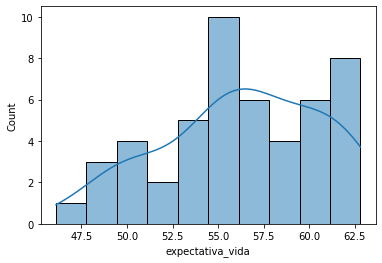

In [11]:
# Histograma para Expectativiva de vida Baixa

baixa_limpa = df_sem_ouliers[df_sem_ouliers['class'] == 0] 

sns.histplot(
data = baixa_limpa,
x='expectativa_vida',
bins= 10,
kde=True
)

Percebe-se que existe para a amostra total analisada que há uma tendência a direita para os dados analisados.

A distribuição para os paises com expectativa de vida alta seguem um padrão muito próximo ao normal
Para os países com baixa expectativa de vida a distribuição é assimétrica à direita.

**BOXPLOT**

<AxesSubplot: ylabel='expectativa_vida'>

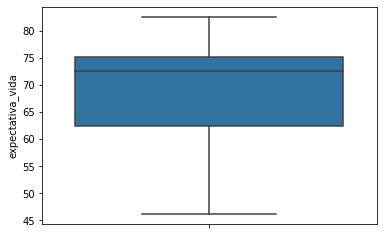

In [12]:
# Boxplot Geral

sns.boxplot(data = df_sem_ouliers,
y = 'expectativa_vida'
)

<AxesSubplot: xlabel='class', ylabel='expectativa_vida'>

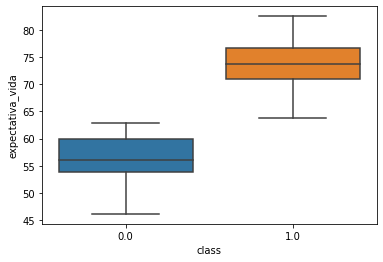

In [13]:
# Boxplot para as classificações

sns.boxplot(data = df_sem_ouliers,
y = 'expectativa_vida',
x = 'class'
)

Tendo removidos os outliers verificamos que os dados possuem um comportamento regular para ser analisado.

# Análise Diagnóstica

Iniciaremos fazendo a comparação entre as médias dos inidicadores em cada classe

In [14]:
df_media = df_sem_ouliers.groupby("class").mean()
df_media

,ano,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,investimento_percentual_pib,hepatite_b,sarampo,IMC,under-five deaths,...,investimento_total_governo,difteria,aids,PIB,populacao,thinness 1-19 years,thinness 5-9 years,IDH,escolaridade,Developed
class,,,,,,,,,,,,,,,,,,,,,
0.0,2007.5,56.332270,288.932398,49.029337,2.505689,81.614703,48.299745,4502.131378,19.705612,75.503827,...,4.971084,63.573980,6.019770,967.408740,7.404813e+06,7.147449,7.059566,0.390122,7.803699,0.000000
1.0,2007.5,73.939412,119.403451,23.597948,4.970695,981.191466,72.021922,1669.352146,44.440532,29.993470,...,5.655770,88.447295,0.185541,8332.399807,1.089032e+07,3.938340,4.012080,0.667369,12.638479,0.238806


c:\Users\Yan Cleiton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


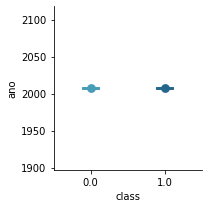

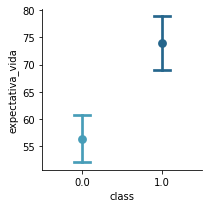

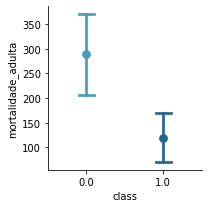

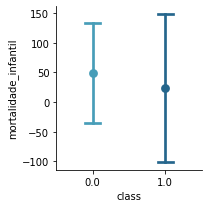

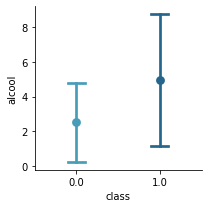

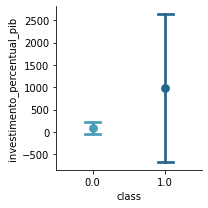

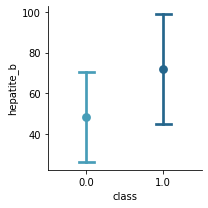

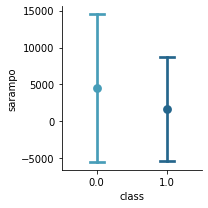

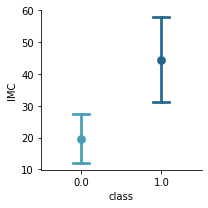

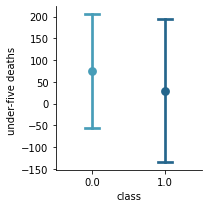

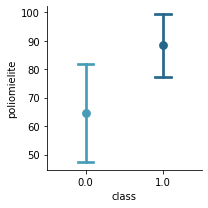

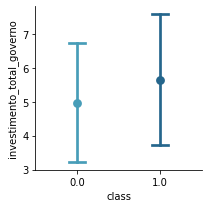

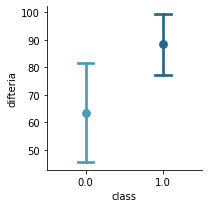

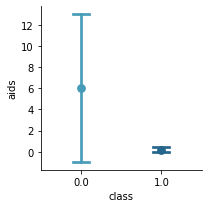

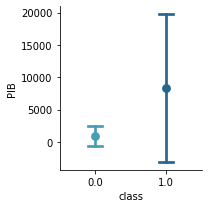

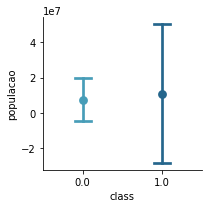

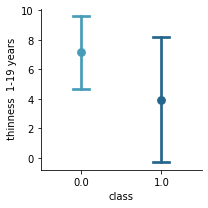

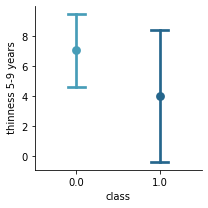

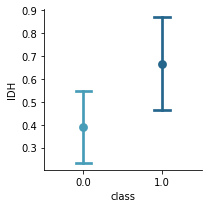

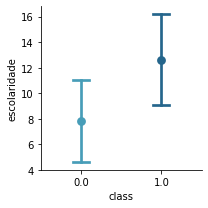

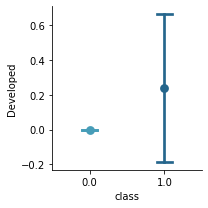

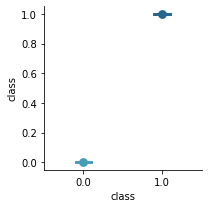

In [15]:
df_media = df_sem_ouliers.groupby("class").mean()
df_std = df_sem_ouliers.groupby("class").std()


def graf_media(variaveis):

    for v in variaveis:
        g = sns.catplot(
            data=df_sem_ouliers, x = 'class' , y=v , hue="class",
            capsize=.2, palette="YlGnBu_d", errorbar="sd", 
            kind="point", aspect=1, height=3,

        )

    return g

graf_media(df_sem_ouliers.columns[1:])

Text(0.5, 1.0, 'Heatmap Correlações')

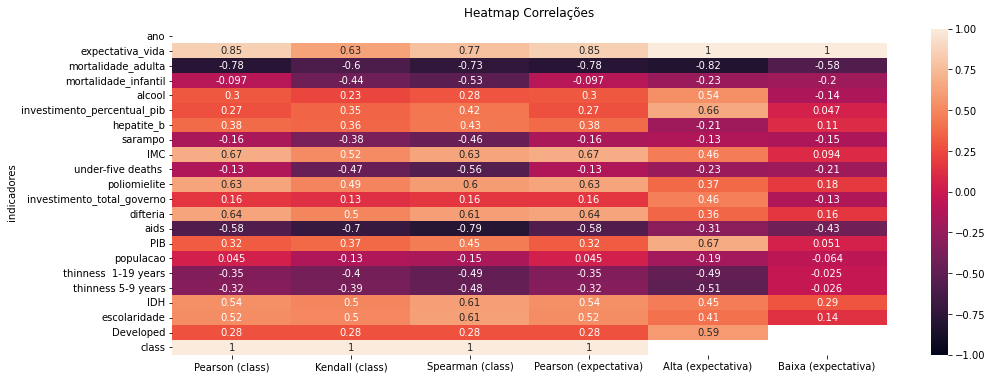

In [16]:
# Verificando correlações entre as variáveis

correl_pearson = df_sem_ouliers.corr(method='pearson')['class']
correl_kendall = df_sem_ouliers.corr(method='kendall')['class']
correl_spearman = df_sem_ouliers.corr(method='spearman')['class']
correl_alta = alta_limpa.corr(method='pearson')['expectativa_vida']
correl_baixa = baixa_limpa.corr(method='pearson')['expectativa_vida']
correl_expectativa = df_sem_ouliers.corr(method='pearson')['expectativa_vida']

correlacoes = [correl_pearson, correl_kendall, correl_spearman]



tabela_correlacoes = pd.DataFrame()
tabela_correlacoes['indicadores'] = df_sem_ouliers.columns[1:]
tabela_correlacoes['Pearson (class)'] = list(correl_pearson)
tabela_correlacoes['Kendall (class)'] = list(correl_kendall)
tabela_correlacoes['Spearman (class)'] = list(correl_spearman)
tabela_correlacoes['Pearson (expectativa)'] = list(correl_pearson)
tabela_correlacoes['Alta (expectativa)'] = list(correl_alta)
tabela_correlacoes['Baixa (expectativa)'] = list(correl_baixa)
tabela_correlacoes.fillna(0)
tabela_correlacoes = tabela_correlacoes.set_index('indicadores')



plt.figure(figsize=(16, 6))

heatmap_geral = sns.heatmap(tabela_correlacoes, vmin=-1, vmax=1, annot=True)
heatmap_geral.set_title('Heatmap Correlações', fontdict={'fontsize':12}, pad=12)



In [17]:
range_correl_geral = []

for cor in correlacoes:
    range_correl_geral.append([abs(cor).min(), abs(cor).max()])

range_correl_geral   



[[0.045082747169033745, 1.0],
 [0.12920069452086733, 1.0],
 [0.15487760145882887, 1.0]]

Afim de definir um valor de correlação que devemos considerar veremos a distribuição de cada uma das correlações para entender onde estão as maiores frequencias de correlação.

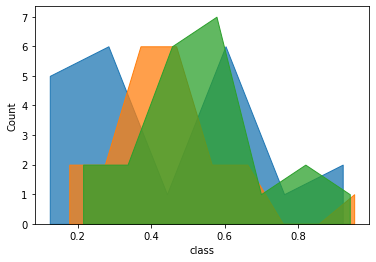

In [18]:
# Distribuição de Pearson, Kendall e Spearman respectivamente

for tabela in correlacoes:
    sns.histplot(
    data = abs(tabela),
    element= 'poly'
    )

Para fazer nossa análise selecionaremos as variáveis que tiveram valor absoluto de correlação superior a 0,4.

In [19]:
# Criando lista com as variávies com mais de 0,4 de correlação absoluta
variaveis = list(correl_pearson[abs(correl_pearson) > 0.4].index)
variaveis.append('mortalidade_infantil')
variaveis

['expectativa_vida',
 'mortalidade_adulta',
 'IMC',
 'poliomielite',
 'difteria',
 'aids',
 'IDH',
 'escolaridade',
 'class',
 'mortalidade_infantil']

In [20]:
def regressao (dataset, variavel,hue=None):
    ax = sns.lmplot(y="expectativa_vida", x=variavel , data=dataset, hue=hue)
    ax.fig.set_size_inches(8, 3)
    ax.fig.suptitle(f'Regressão - {variavel} x Expectativa de vida', fontsize=16, y=1.02)
    ax.set_xlabels(variavel, fontsize=14)
    ax.set_ylabels("Expectativa de vida", fontsize=14)
    return ax


Analisando a regressão de expectativa de vida para Para os status de desenvolvimento dos paises

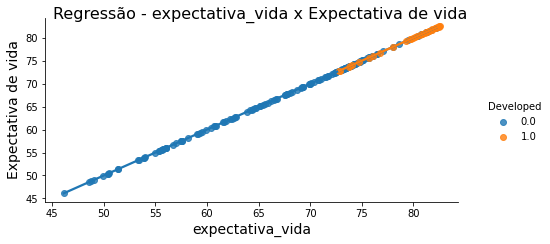

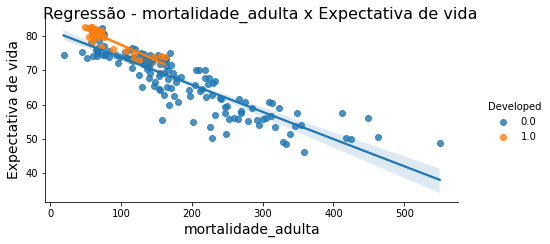

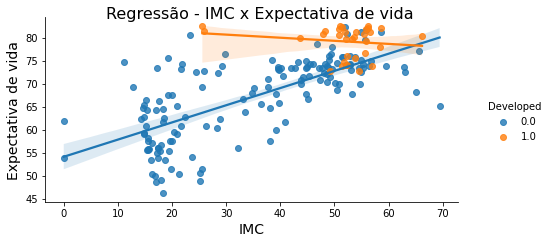

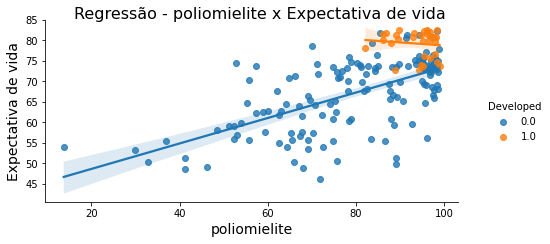

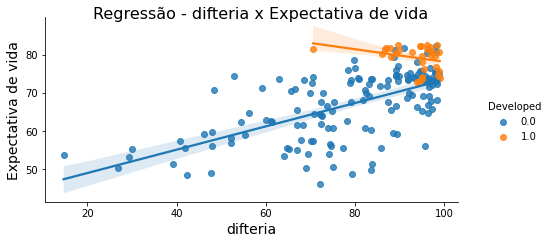

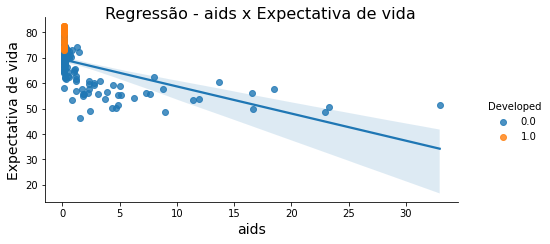

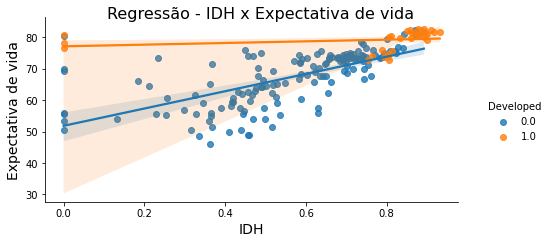

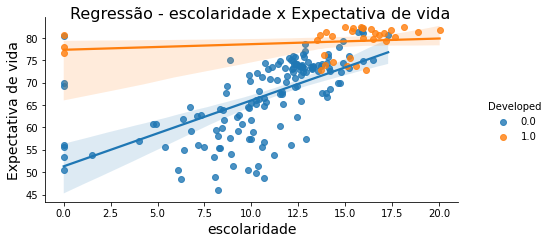

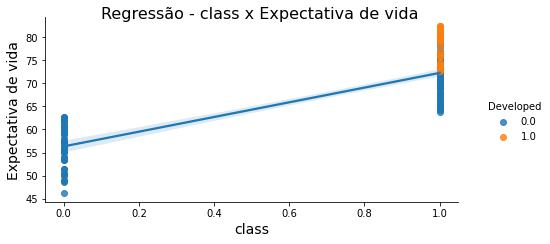

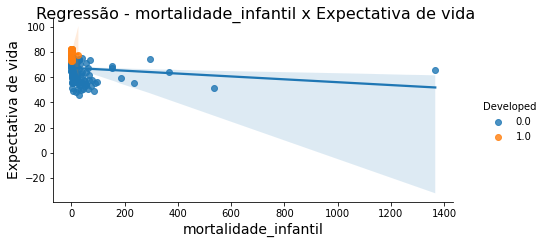

In [21]:
for variavel in variaveis:
    regressao(df_sem_ouliers,  variavel=variavel,  hue='Developed')


Analisando a regressão de expectativa de vida para Para as classificações de expectativa de vida

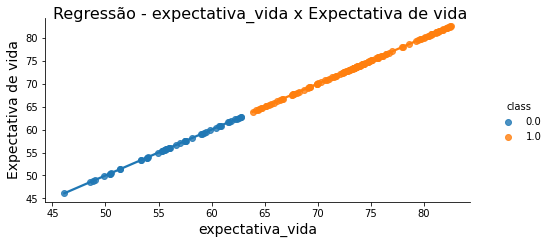

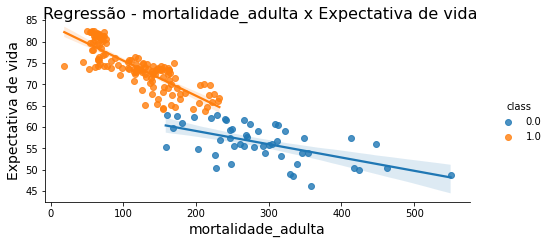

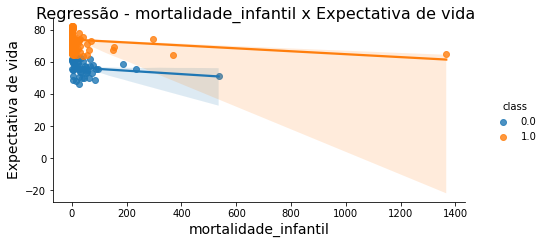

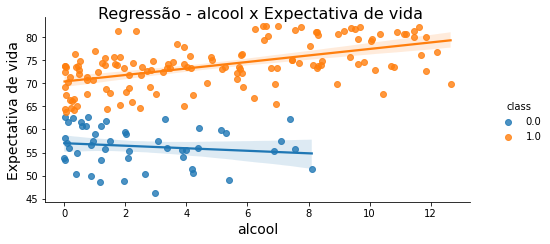

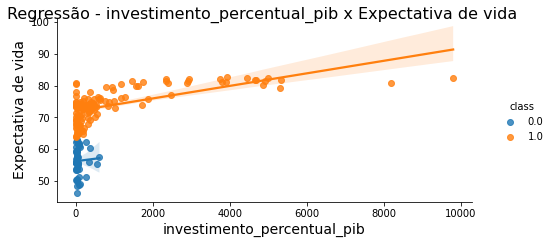

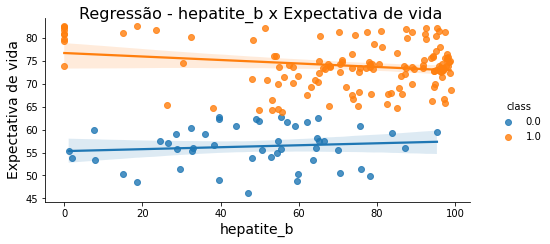

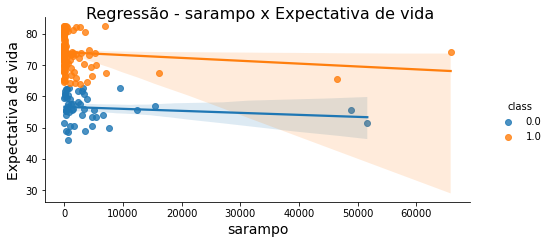

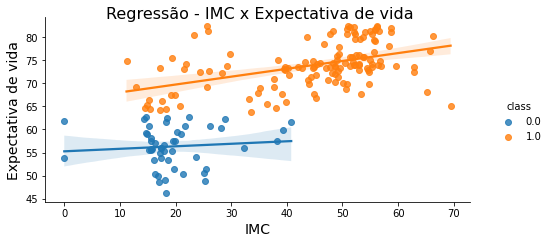

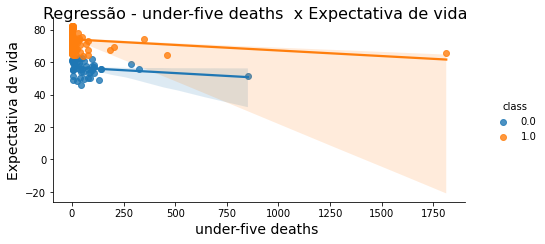

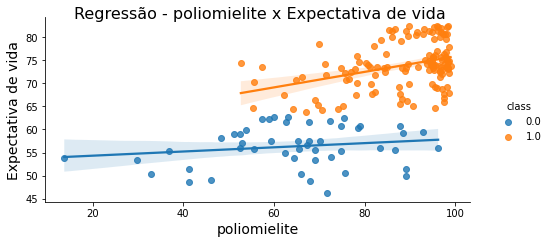

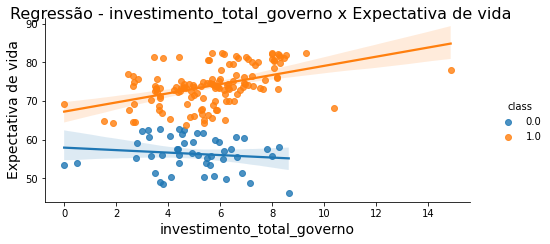

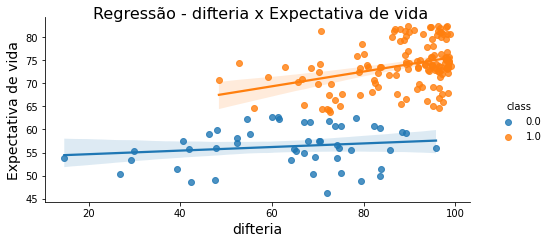

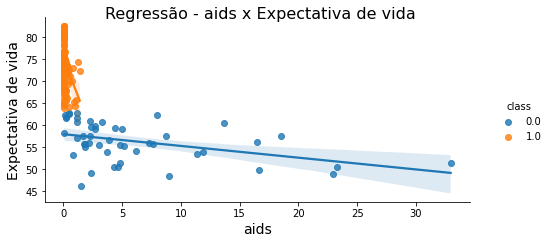

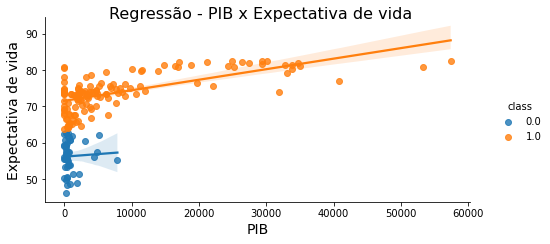

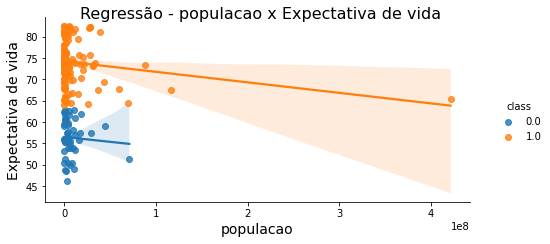

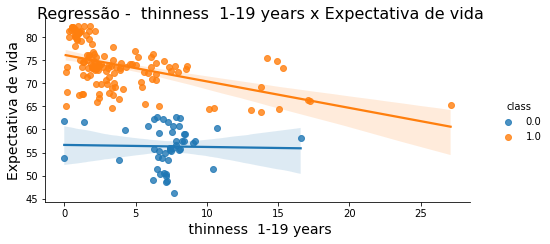

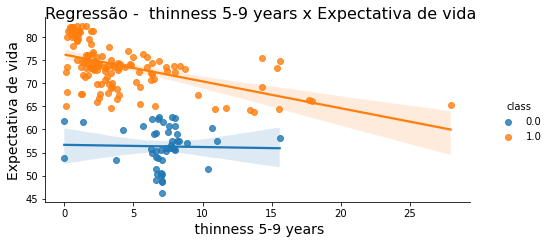

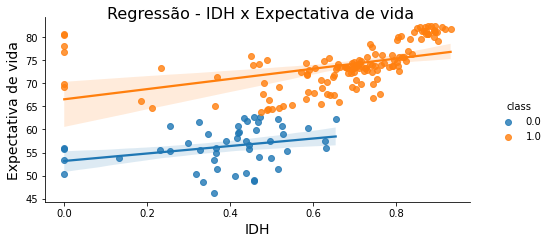

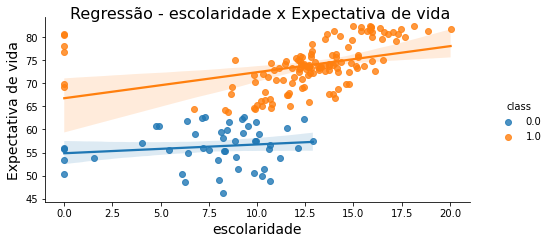

In [22]:
for variavel in correl_pearson.index[1:-2]:
    regressao(df_sem_ouliers,  variavel=variavel,  hue='class')